### Detecting the lesion and cropping to a square

This piece of code can detect the lesion using OpenCV's **findcontours** function. https://docs.opencv.org/trunk/dd/d49/tutorial_py_contour_features.html

There may be more than one contour (eg the lesion itself and a small scar) so the **boundingRect** function is used to find the largest contour detected. These dimensions are then padded out to ensure some surrounding skin is also included, and finally the dimensions are used to crop the image to a square. 

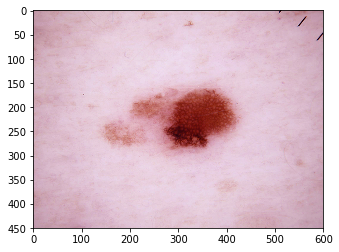

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# first load a sample lesion image from file and display it to compare later ( i have included this image in repository)
img = cv2.imread("ISIC_0024313.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Next find all the contours in the image and set a bounding box around each contour until we get the coordinates of the largest bounding box. This will give us the dimensions to crop the image around the largest contour (the lesion).

In [61]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

# threshold to get just the lesion
retval, thresh_gray = cv2.threshold(gray, thresh=160, maxval=255, \
                                   type=cv2.THRESH_BINARY_INV)

# finding the contours
image, contours, hierarchy = cv2.findContours(thresh_gray,cv2.RETR_LIST, \
                                   cv2.CHAIN_APPROX_SIMPLE)

# Find object with the biggest bounding box
# use boundingRect to set a bounding box around each cont in contour
# largest one (hopefully the lesion - this has not been tested on all images) is saved as dimensions mx

mx = (0,0,0,0)      # biggest bounding box so far
mx_area = 0
for cont in contours:
    x,y,w,h = cv2.boundingRect(cont)
    x, y, w, h = x-60, y-60, w+120,h+120 # make the bounding box a bit bigger
    area = w*h
    if area > mx_area:
        mx = x,y,w,h
        mx_area = area
x,y,w,h = mx

Print the coordinates below:

In [38]:
print('Bottom left Corner:',x,'\nTop Left Corner:',y,'\nBottom Right Corner:',w,'\nTop Right Corner:',h)

Bottom left Corner: 145 
Top Left Corner: 102 
Bottom Right Corner: 337 
Top Right Corner: 247


To ensure we don't crop outside of the actual image (ie. the coordinates for w above may be out of range) we'll get the dimensions of the image and crop according to whichever is smallest. 

In [66]:
l = max(h, w)
print(l)

H, W,_ = img.shape
print(H,W)

l = min(l, H-y, W-x)
print(l)

cropped=img[y:y+l,x:x+l]

# basic code below doesn't take image dimensions of whole image into account, also doesn't crop into square shape. 
# cropped=img[y:y+h,x:x+w]

337
450 600
337


Final image

Cropped Image:
 Lesion is slightly off centre and left edge slightly cut off. If there is an OpenCV expert in CIT perhaps they could lend 
 a hand to get this exactly in the centre, although I don't think this is 100% necessary for CNNs


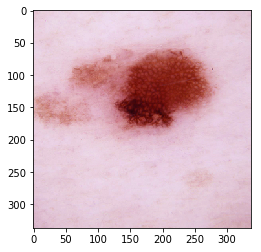

In [65]:
print('Cropped Image:\n Lesion is slightly off centre and left edge slightly cut off. If there is an OpenCV expert in CIT perhaps they could lend \n a hand to get this exactly in the centre, although I don\'t think this is 100% necessary for CNNs')
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show()

Oringinal Image:


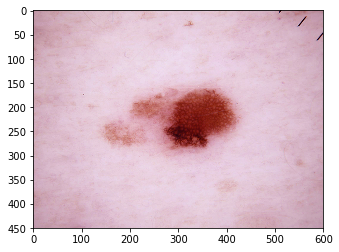

In [49]:
print('Oringinal Image:')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

This will need to be tested on all 10,000 images and checked by eye to see if it works on all images. 